# CHAPTER 12  
***  
 - useful when you need extra control to write custom loss functions, custom metrics, layers, models, initializers, regularizers, weight constraints, and more.  
 <br>
 
 
 1. brief overview of TensorFlow, 
 2. we looked at TensorFlow’s low-level API, including tensors, operations, variables, and special data structures. 
 3. use these tools to customize almost every component in tf.keras.  
 4. Finally, how TF Functions can boost performance, how graphs are generated using AutoGraph and tracing, and what rules to follow when you write TF Functions 

## A Quick Tour of TensorFlow  
***  
 - Similar to NumPy, but with GPU support.  
 - Supports distributed computing (across multiple devices and servers)  
 - It includes a kind of just-in-time (JIT) compiler that allows it to optimize computations for speed and memory usage.  
 - Train a TensorFlow model in one environment (e.g., using Python on Linux) and run it in another (e.g., using Java on an Android device).  
 - It implements autodiff  
 - <font color=pink>tf.keras</font>  
 - data loading and preprocessing ops (<font color=pink>tf.data, tf.io</font>, etc.)  
 - image processing ops (<font color=pink>tf.image</font>)  
 - signal processing ops (<font color=pink>tf.signal</font>)
  
  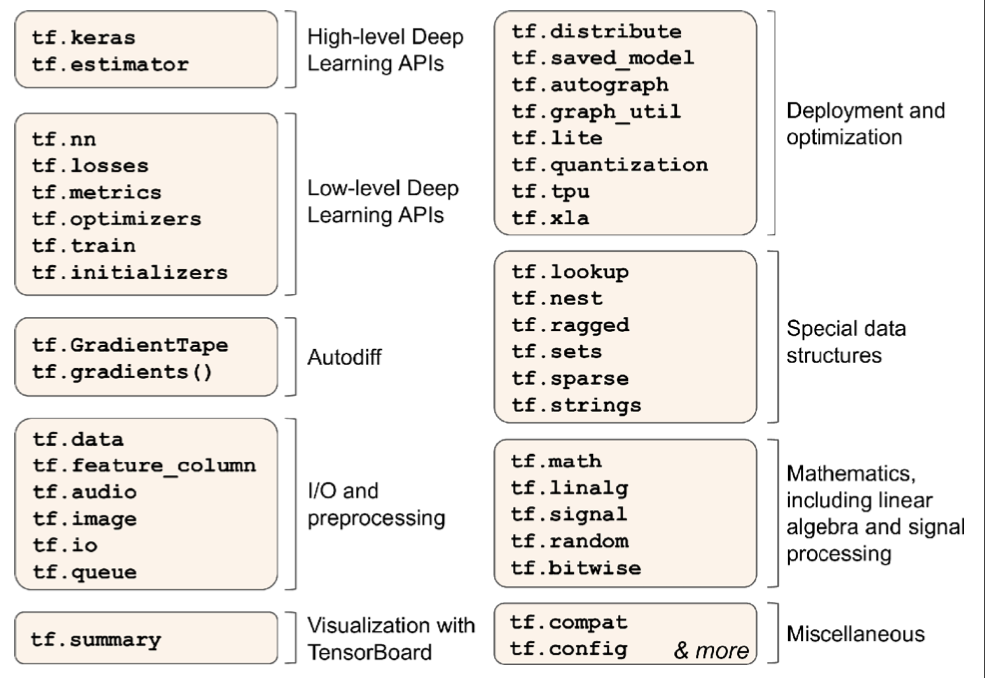
  
 
  Most of the time your code will use the high-level APIs (especially tf.keras and tf.data)  
  https://paperswithcode.com  
  https://github.com/jtoy/awesome-tensorflow  
  

## Using TensorFlow like NumPy  
***  
 - A tensor is very similar to a NumPy ndarray  
 - but it can also hold a scalar (a simple value, such as 42)

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    !pip install -U tqdm
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Tensors and Operations  
***  
You can create a tensor with <font color=pink>tf.constant()</font>

In [5]:
tf.constant([[1., 2., 3.], [4., 5., 6.]]) # matrix

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [6]:
tf.constant(42) # scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [7]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [5]:
t.shape

TensorShape([2, 3])

In [7]:
t.dtype

tf.float32

## Indexing  
***  


In [15]:
t[0:,:] #[row, colum]

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [12]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [9]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

## Ops  
***  
- and * are also supported.  
- The @ operator was added in Python 3.5, for matrix multiplication: it is equivalent to calling the <font color=pink>tf.matmul()</font> function.  
- <font color=pink>tf.reduce_mean(), tf.reduce_sum(), tf.reduce_max(), tf.math.log()</font> are the equivalent of <font color=pink>np.mean(), np.sum(), np.max(), np.log()</font>.


In [16]:
t+10 # t + 10 is equivalent to calling tf.add(t, 10) 

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [20]:
t.__add__(10)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [18]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [9]:
t1 =tf.transpose(t)
t1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 4.],
       [2., 5.],
       [3., 6.]], dtype=float32)>

In [19]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

## Using keras.backend  
***  
<font color=pink>keras.backend</font>, which is commonly named K for short. 

In [21]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

# Tensors and NumPy  
***  
  - you can create a tensor from a NumPy array.  
  - NumPy arrays and NumPy oper‐ ations to tensors
 

In [23]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [24]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [26]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [27]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [28]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

# Type Conversions  
***  
 - Type conversions can significantly hurt performance.  
 - TensorFlow does not perform any type conversions automatically: it just raises an exception if you try to execute an operation on tensors with incompatible types.  
 (you cannot add a float tensor and an integer tensor, and you cannot even add a 32-bit float and a 64-bit float)


In [33]:
# tf.constant(2.) + tf.constant(40) # error

In [32]:
# tf.constant(2.) + tf.constant(40., dtype=tf.float64) #error

In [31]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [34]:
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


In [36]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32) #tf.cast convert type

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

# Variables
***  
 values we’ve seen so far are immutable: you cannot modify them.  
 - we cannot use regular tensors to implement weights in a neural network

In [37]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [38]:
v.assign(2 * v) # => [[2., 4., 6.], [8., 10., 12.]]

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [39]:
v[0, 1].assign(42) # => [[2., 42., 6.], [8., 10., 12.]]

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [40]:
v[:, 2].assign([0., 1.]) # => [[2., 42., 0.], [8., 10., 1.]]

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [41]:
# (direct item assignment will not work) 
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [42]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]],
                    updates=[100., 200.]) # => [[100., 42., 0.], [8., 10., 200.]]

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [43]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]],
                                indices=[1, 0])
v.scatter_update(sparse_delta) # => [[4., 5., 6.], [1., 2., 3.]] 

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

# APPENDIX F
***
# Other Data Structures
***  
 # Sparse tensors (<font color=pink>tf.SparseTensor</font>)  
 - you <font color=green>can</font> multiply a sparse tensor by any scalar value, and you get a new sparse tensor.  
 - but you <font color=green>cannot</font> add a scalar value to a sparse tensor, as this would not return a sparse tensor

In [44]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])

In [45]:
print(s) 

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [46]:
tf.sparse.to_dense(s)  
# 0,1 에 1
# 1,0 에 2
# 2,3 에 3

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [53]:
s2 = s * 2.0
print(s2)    # value * 2 -> [2. 4. 6.]

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [48]:
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [49]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [50]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(s5)    
# 0,2에 1
# 0,1에 2
#[0,2,1]


SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [51]:
# 순서 맞아야한다 [0,1] [0,2]
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [52]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

# Tensor Arrays  (<font color=pink>tf.TensorArray</font>)   
***  
 - represents a list of tensors.  
 - handy in dynamic models containing loops.  
 - to accumulate results and later compute some statistics.  
 <br>   
 
 
 All tensors they contain must have the same shape and data type.
 - When creating a TensorArray, you must provide its size, except in graph mode.  
  - you can leave the <font color=pink>size</font> unset and instead set <font color=pink>dynamic_size=True</font>  
  - this will hinder performance.(알면 세팅하자 꼭)  
 - You must also specify the <font color=pink>dtype</font>

In [22]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))    # array.read(1)
array = array.write(2, tf.constant([5., 7.]))

In [30]:
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [ ]:
array.read(1)    
# Could not read index 1 twice because it was cleared after a previous read 
# (perhaps try setting clear_after_read = false?)

In [23]:
array.stack()    # You can stack all the items into a regular tensor 
                 # 왜 [0., 0.]???

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1.,  2.],
       [ 3., 10.],
       [ 5.,  7.]], dtype=float32)>

In [24]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([3.       , 6.3333335], dtype=float32)>

In [25]:
variance

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 2.6666667, 10.888888 ], dtype=float32)>

# Ragged Tensors (<font color=pink>tf.ragged</font>) 
***  
 - static lists of lists of tensors, where every tensor has the same shape and data type.  
  - tensor with one or more ragged dimensions.  
  - meaning dimensions whose slices may have different lengths.  
  - In the ragged tensor r, the second dimension is a ragged dimension.  
  - In all ragged tensors, the first dimension is always a regular dimension (also called a uniform dimension).

In [38]:
# All the elements of the ragged tensor r are regular tensors  
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [39]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [41]:
# axis=0

r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis=0))    
#  [65, 66], [], [67]] + [67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [42]:
# axis=1 , ith tensor in r and the ith tensor in r3 were concatenated.

r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))
# [67, 97, 102, 233,  +  68, 69, 70], [67, 111, 102, 102, 101, 101, +  71], [99, 97, 102, 102, 232],
# [21654, 21857,   +  72, 73]

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [43]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [44]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

# Strings  
***  
 - useful in particular for natural language pro‐ cessing (see <font color=green>Chapter 16</font>)  
 -  tf.string, the string length is not part of the tensor’s shape.  
  -  strings are considered as atomic values.  
 - Unicode string tensor (i.e., an int32 tensor)
  - the length of the string is part of the tensor’s shape.

In [46]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [47]:
# If you try to build a tensor with a Unicode string, 
# TensorFlow automatically encodes it to UTF-8
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [48]:
# possible to create tensors representing Unicode strings. 
# Just create an array of 32-bit integers,
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [52]:
# length() to count the number of bytes in a byte string
# unicode_encode() to convert a Unicode string tensor(i.e., int32 tensor) to a byte string tensor
# unicode_decode() to do the reverse
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")    # or the number of code points if you set unit="UTF8_CHAR"

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [55]:
b

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [56]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

# String arrays (<font color=pink>tf.string</font>)  
***  
 - These represent byte strings, not Unicode strings, so if you create a string tensor using a Unicode string.
 - <font color=pink>tf.strings</font> package (with an s) contains ops for byte strings and Unicode strings (and to convert one into the other).  
 - <font color=pink>tf.string</font> is atomic, meaning that its <font color=green>length does not appear</font> in the tensor’s shape. 

In [34]:
# manipulate tensors containing multiple strings.
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [37]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

In [36]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

In [45]:
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>


# Sets(<font color=pink>tf.sets</font>) 
***  
 - supports sets of integers or strings (but not floats).  
 - set {1, 5, 9} is just represented as the tensor [[1, 5, 9]]  
 - [[1, 5, 9], [2, 5, 11]] is a tensor holding two independent sets: {1, 5, 9} and {2, 5, 11}.


In [71]:
# the result is a sparse tensor, so we call to_dense() to display it
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]], dtype=int32)>

In [69]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [68]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

In [74]:

# size() ??

TypeError: Expected `SparseTensor`, got tf.Tensor(
[[2 3 5 7]
 [7 9 0 0]], shape=(2, 4), dtype=int32).

In [66]:
# prefer to use a different padding value, you must set default_value when calling to_dense()
# default_value is 0 when dealing 
# with string sets, you must set the default_value (e.g., to an empty string)
tf.sparse.to_dense(tf.sets.union(set1, set2), default_value=-1)

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10, -1, -1]], dtype=int32)>

# Variables (<font color=pink>tf.Variable</font>)  
***  


# Queues (<font color=pink>tf.queue</font>)  
***  
 - <font size=6>A queue is a data structure to which you can push data records, and later pull them out.</font>  
 - They used to be very important  
  - tf.data API has essentially rendered them useless, provides all the tools you need to build efficient pipelines.  
 - FIFOQueue  
 - PriorityQueue  
 - RandomShuffleQueue  
 - PaddingFIFOQueue

# Customizing Models and Training Algorithms  
***  
## creating a custom loss function  
***  
 - clean up your dataset by removing or fixing the outliers, but that turns out to be insufficient:  

Which loss function should you use?  
 - <font color=green>mean squared error</font> might penalize large errors too much.  
 - <font color=green>mean absolute error</font> would not penalize outliers as much, but training might take a while to converge.  
 - probably a good time to use the <font color=green>Huber loss</font>: <font color=pink>keras.losses.Huber</font> 

In [78]:
# For better performance, you should use a vectorized implementation
# if you want to benefit from TF’s graph features, you should use only TensorFlow operations.

def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1    # if true
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

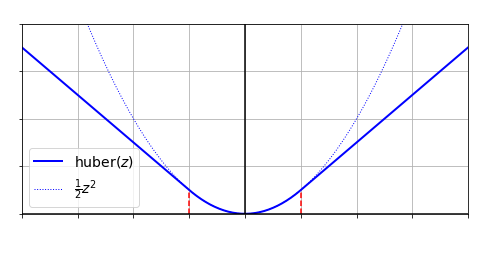

In [83]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$", color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14, color='w')
plt.show()

In [60]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [23]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [86]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [87]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.6235 - mae: 0.9953 - val_loss: 0.2862 - val_mae: 0.5866
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2197 - mae: 0.5177 - val_loss: 0.2382 - val_mae: 0.5281


But what happens to this custom loss when you save the model?
# Saving and Loading Models That Contain Custom Components  
***  


In [88]:
# 저장
model.save("my_model_with_a_custom_loss.h5")

In [89]:
# any error between –1 and 1 is considered “small.”
model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn})

In [90]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2054 - mean_absolute_error: 0.4982 - val_loss: 0.2209 - val_mean_absolute_error: 0.5050
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.1999 - mean_absolute_error: 0.4900 - val_loss: 0.2127 - val_mean_absolute_error: 0.4986


what if you want a different threshold?  
 -  Unfortunately, when you save the model, the <font color=green>threshold will not be saved</font>. 

In [91]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [92]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [93]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2226 - mae: 0.4892 - val_loss: 0.2540 - val_mae: 0.4907
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2184 - mae: 0.4844 - val_loss: 0.2372 - val_mae: 0.4879


In [94]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [95]:
# you will have to specify the threshold value when loading the model 
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

In [96]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2147 - mean_absolute_error: 0.4800 - val_loss: 0.2133 - val_mean_absolute_error: 0.4654
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2119 - mean_absolute_error: 0.4762 - val_loss: 0.1992 - val_mean_absolute_error: 0.4643


You can solve this by creating a subclass of the <font color=pink>keras.losses.Loss</font> class, and then implementing its <font color=pink>get_config()</font> method:  
<br>  
  - Keras API currently only specifies how to use subclassing to define layers, models, callbacks, and regularizers.  
  - If you build other components (such as losses, metrics, initializers, or constraints) using subclassing, they may not be portable to other Keras implementations.

In [99]:
class HuberLoss(keras.losses.Loss):
    
    # constructor accepts **kwargs and passes them to the parent constructor,
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)    # super().get config()
        
    # The call() method takes the labels and predictions, 
    # computes all the instance losses, and returns them.    
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    
    # get_config() method returns a dictionary mapping each hyperparameter name to its value.
    # 1. first calls the parent class’s get_config() method  
    # 2. then adds the new hyperparameters to this dictionary 
    #    (note that the convenient {**x} syntax was added in Python 3.5).
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [98]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [100]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])


In [101]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 0.7095 - mae: 0.8863 - val_loss: 0.3378 - val_mae: 0.5485
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2416 - mae: 0.5083 - val_loss: 0.2660 - val_mae: 0.5089


In [102]:
# When you save the model, the threshold will be saved along with it;
model.save("my_model_with_a_custom_loss_class.h5")

In [ ]:
## when you load the model, you just need to map the class name to the class itself
#model = keras.models.load_model("my_model_with_a_custom_loss_class.h5", # TODO: check PR #25956
#                                custom_objects={"HuberLoss": HuberLoss})

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

In [ ]:
#model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",  # TODO: check PR #25956
#                                custom_objects={"HuberLoss": HuberLoss})

In [103]:
model.loss.threshold

2.0

# Custom Activation Functions, Initializers, Regularizers, and Constraints  
***  
Here are examples:  
 - a custom activation function (equivalent to <font color=pink>keras.activations.softplus()</font> or <font color=pink>tf.nn.softplus()</font>)  
 - a custom Glorot initializer (equivalent to  <font color=pink>keras.initializers.glorot_normal()</font>)  
 - a custom l1 regularizer (equivalent to <font color=pink>keras.regularizers.l1(0.01)</font>)  
 - a custom constraint that ensures weights are all positive (equivalent to <font color=pink>keras.constraints.nonneg()</font> or <font color=pink>tf.nn.relu()</font>)

In [104]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [105]:
def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [106]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

 - If a function has hyperparameters that need to be saved along with the model, then you will want to subclass the appropriate class. 
  - <font color=pink>keras.regularizers.Regularizer</font>  
  - <font color=pink>keras.constraints.Constraint</font>  
  - <font color=pink>keras.initializers.Initializer</font>  
  - <font color=pink>keras.layers.Layer</font>

In [107]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [108]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [109]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [110]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [111]:
model.save("my_model_with_many_custom_parts.h5")

In [112]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

 - this time we do not need to call the parent constructor or the <font color=pink>get_config()</font> method, as they are not defined by the parent class:  
  -  <font color=pink>call()</font> method for losses, layers (including activation functions), and models  
  - <font color=pink>\_\_call\_\_()</font> method for regularizers, initializers, and constraints

In [113]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [114]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [115]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [116]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [117]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [118]:
model.save("my_model_with_many_custom_parts.h5")

In [119]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })


# Custom Metrics  
***  
 -  Losses and metrics are conceptually not the same thing.  
  - <font color=green>losses (e.g., cross entropy)</font> are used by Gradient Descent to train a model.  
     - so they must be differentiable.  
     - their gradients should not be 0 everywhere.  
     - t’s OK if they are not easily interpretable by humans  
 
  - <font color=green>metrics (e.g., accuracy)</font> are used to evaluate a model.  
     - must be more easily interpretable  
     - they can be non-differentiable or have 0 gradients everywhere.

In [128]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42) 

In [129]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [130]:
# most cases, defining a custom metric function is exactly
# the same as defining a custom loss function.  
# can use the Huber loss function we created earlier as a metric;
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [131]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 2.0982 - huber_fn: 0.9192
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.6052 - huber_fn: 0.2733


# Warning: 
 - if you use the same function as the loss and a metric, you may be surprised to see different results.   
 <br>
 due to floating point precision errors: even though the mathematical equations are equivalent, the operations are not run in the same order, which can lead to small differences.  
 <br>  
 
 Moreover, when using sample weights, there's more than just precision errors:
  
  - the loss since the start of the epoch is the mean of all batch losses seen so far. Each batch loss is the sum of the weighted instance losses divided by the batch size (not the sum of weights, so the batch loss is not the weighted mean of the losses).
  
  - the metric since the start of the epoch is equal to the sum of weighted instance losses divided by sum of all weights seen so far. In other words, it is the weighted mean of all the instance losses. Not the same thing.
  

If you do the math, you will find that loss = metric * mean of sample weights (plus some floating point precision error).

In [132]:
# loss = Huber, metrics = Huber
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

In [133]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 0.1175 - huber_fn: 0.2399
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1131 - huber_fn: 0.2297


In [134]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.11749906837940216, 0.11906625573138947)

# Streaming metrics (<font color=pink>keras.metrics.Precision</font>) 
***
 - precision = number of true positives / number of positive predictions(true positives + false positives)    
 $\frac{TP}{TP+FP}$
   
   <br>
 - like precision, cannot simply be averaged over batches:  
  - there’s no other option than to implement a streaming metric.

In [135]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [136]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [139]:
precision.result()    #to get the current value of the metric.

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [138]:
precision.variables    # look at its variables (tracking the number of true and false positives) 

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [140]:
precision.reset_states()    # # both variables get reset to 0.0

In [155]:
# simple example that keeps track of the total Huber loss Customizing Models and Training Algorithms
# and the number of instances seen so far.  
# when asked for the result, it returns the ratio, which is simply the mean Huber loss.  
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold) # TODO: investigate why this fails
        
        # uses the add_weight() method to create the variables needed to 
        # keep track of the metric’s state over multiple batches.
        # sum of all Huber losses (total) 
        self.total = self.add_weight("total", initializer="zeros")
        # number of instances seen so far (count)
        self.count = self.add_weight("count", initializer="zeros")
#     def huber_fn(self, y_true, y_pred): # workaround
#         error = y_true - y_pred
#         is_small_error = tf.abs(error) < self.threshold
#         squared_loss = tf.square(error) / 2
#         linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
#         return tf.where(is_small_error, squared_loss, linear_loss)
    
    # It updates the variables, given the labels and predictions for one batch   
    # use instance ->update variables given the label and prediction for one batch
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
        
    # computes and returns the final result.  
    # The mean Huber metric over all instances.
    def result(self):
        return self.total / self.count
    
    # ensure the threshold gets saved along with the model.
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [156]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [157]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [158]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [159]:
#  reset_states(), resets all variables to 0.0 (but you can override it if needed).
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

Let's check that the HuberMetric class works well:

In [160]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [161]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])


In [162]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

In [163]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.8707 - huber_metric: 0.8707
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2595 - huber_metric: 0.2595


In [164]:
model.save("my_model_with_a_custom_metric.h5")

In [165]:
#model = keras.models.load_model("my_model_with_a_custom_metric_v2.h5",        # TODO: check PR #25956
#                                custom_objects={"HuberMetric": HuberMetric})

In [166]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2350 - huber_metric: 0.2350
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2278 - huber_metric: 0.2278


In [167]:
model.metrics[-1].threshold

2.0

# Custom Layers  
***  
 - model is a sequence of layers A, B, C, A, B, C, A, B, C   
 - then you might want to define a custom layer D containing layers A, B, C  
 - so your model would then simply be D, D, D. 

In [168]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [169]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

 - Adding an exponential layer at the output of a regression model can be useful if the values to predict are positive and with very different scales (e.g., 0.001, 10., 10000):

In [170]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [171]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 2s 7ms/step - loss: nan - val_loss: nan
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: nan


nan

In [172]:
class MyDense(keras.layers.Layer):
    
    # constructor takes all the hyperparameters as arguments 
    # (in this example, units and activation)
    # arguments such as input_shape, trainable, and name.
    # Then it saves the hyperparameters as attributes,
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation) # converting the activation argument to the appropriate activation function

    
    # role is to create the layer’s variables by calling add_weight() method for each weight
    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        # you must call the parent’s build() method:
        # this tells Keras that the layer is built 
        super().build(batch_input_shape) # must be at the end

    # method performs the desired operations.
    # we compute the matrix multiplication of the inputs X and the layer’s kernel, 
    # we add the bias vector, and we apply the activation function to the result
    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    # simply returns the shape of this layer’s outputs.
    #  it is the same shape as the inputs, 
    # except the last dimension is replaced with the number of neurons in the layer. 
    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units]) # as_list(): can convert to Python lists

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)} # we save the activation function’s full configuration
                                                                            # by calling keras.activations.serialize().


In [173]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [174]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [175]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 2.2563 - val_loss: 0.9472
Epoch 2/2
162/162 [==============================] - 0s 1ms/step - loss: 0.5474


0.5473727583885193

In [176]:
model.save("my_model_with_a_custom_layer.h5")

In [177]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

#### To create a <font color=green>layer with multiple inputs</font> (e.g., Concatenate)  
  - argument to the call() method should be a tuple containing all the inputs.  
  - similarly the argument to the compute_output_shape() method should be a tuple containing each input’s batch shape.

In [179]:
# takes two inputs and returns two outputs:
class MyMultiLayer(keras.layers.Layer):
    
    # To create a layer with multiple outputs, the call() method should return the list of outputs, 
    def call(self, X):
        X1, X2 = X
        return X1 + X2, X1 * X2

    # compute_output_shape() should return the list of batch output shapes (one per output).
    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]    # should probably handle broadcasting rules

In [181]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [182]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

In [183]:
inputs1

<tf.Tensor 'input_1:0' shape=(None, 2) dtype=float32>

In [184]:
# let’s create a layer that adds Gaussian noise during training (for regularization) 
# but does nothing during testing (Keras has a layer that does the same thing, keras.layers.GaussianNoise):
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [185]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 0.4904 - val_loss: 0.5329
Epoch 2/2
162/162 [==============================] - 0s 1ms/step - loss: 0.3990


0.3990039527416229

# Custom Models  
***  
 - example: an arbitrary model with a custom ResidualBlock layer containing a skip connection  
 
 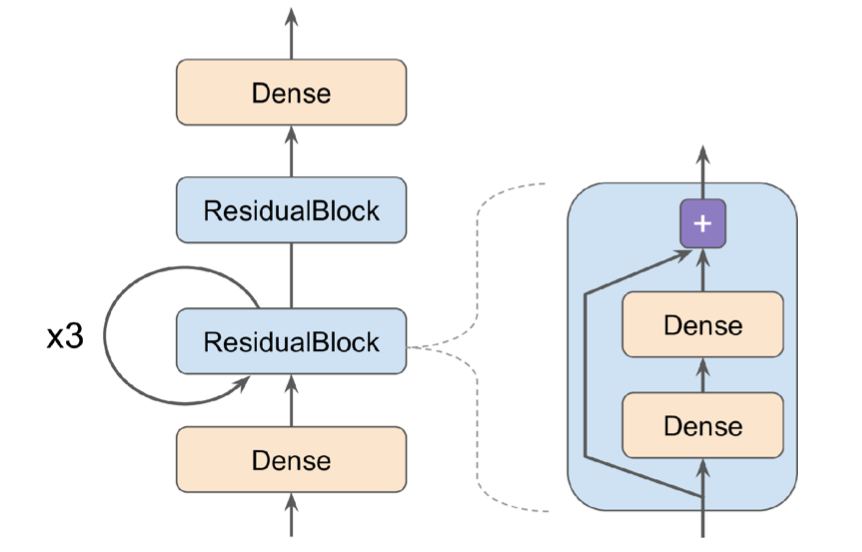  
 
 - you can easily build any kind of model you want, even one that contains loops and skip connections

In [186]:
X_new_scaled = X_test_scaled

In [187]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [188]:
# use the Subclassing API to define the model itself:
# model can then be used to(compile it, fit it, evaluate it, and use it to make predictions)
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [189]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [190]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 2s 4ms/step - loss: 9.1325
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 1.0578
Epoch 3/5
363/363 [==============================] - 2s 5ms/step - loss: 0.8868
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5831
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.6512


In [193]:
model.save("my_custom_model.ckpt")

INFO:tensorflow:Assets written to: my_custom_model.ckpt/assets


In [194]:
model = keras.models.load_model("my_custom_model.ckpt")

In [195]:
history = model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
363/363 [==============================] - 1s 3ms/step - loss: 0.8040
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5330
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4775
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5461
Epoch 5/5
363/363 [==============================] - 1s 4ms/step - loss: 0.5788


 - We could have defined the model using the sequential API instead:

In [196]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [197]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

In [198]:
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 1s 4ms/step - loss: 0.8695
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.4720
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 0.5537
Epoch 4/5
363/363 [==============================] - 1s 4ms/step - loss: 0.3809
Epoch 5/5
162/162 [==============================] - 0s 1ms/step - loss: 0.4852


 - usually cleaner to distinguish the internal components of your model (i.e., layers or reusable blocks of layers) from the model itself (i.e., the object you will train).  
 - you can naturally and concisely build almost any model that you find in a paper, using the Sequential API, the Functional API, the Subclassing API.
  - first, how to define losses or metrics based on model internals  
  - second, how to build a custom training loop.

# Losses and Metrics Based on Model Internals  
***  
 - To define a custom loss based on model internals, compute it based on any part of the model you want, then pass the result to the <font color=pink>add_loss()</font> method.  
 <br>  
 - let’s build a custom regression MLP model composed of a stack of five hidden layers plus an output layer.  
  - custom model will also have an auxiliary output on top of the upper hidden layer.  
  - The loss associated to this auxiliary output will be called the reconstruction loss (see <font color=green>Chapter 17</font>):(it is the mean squared difference between the reconstruction and the inputs)  
  <br>  
  - by adding this reconstruction loss to the main loss, we will encourage the model to preserve as much information as possible through the hidden layers—even information that is not directly useful for the regression task itself.

In [222]:
class ReconstructingRegressor(keras.models.Model):
    
    # DNN with five dense hidden layers and one dense output layer.
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
        # TODO: check https://github.com/tensorflow/tensorflow/issues/26260
#         self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    # creates an extra dense layer which will be used to recontruct the inputs of the model.
    # must be created here because its number of units must be equal to the number of inputs,
    # and this number is unknown before the build() method is called.
    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)

    # 1. processes the inputs through all five hidden layers, 
    #   then passes the result through the reconstruction layer.
    # 2. method computes the reconstruction loss
    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)    # adds it to the model’s list of losses
                                            # we scale down the reconstruction loss by multiplying it by 0.05
                                            # This ensures that the reconstruction loss does not dominate the main loss
#         if training:
#             result = self.reconstruction_mean(recon_loss)
#             self.add_metric(result)
        return self.out(Z)    # 3. passes the output of the hidden layers to the output layer and returns its output.

In [223]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [224]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")

y_pred = model.predict(X_test_scaled)

history = model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.7885 - reconstruction_error: 1.0474
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.4126 - reconstruction_error: 0.4022


In [225]:
y_pred 

array([[-0.7479842 ],
       [-0.22853142],
       [-0.4609779 ],
       ...,
       [ 1.0739707 ],
       [ 0.04426447],
       [ 0.9245955 ]], dtype=float32)

# To understand how to use autodiff (see <font color=green>Chapter 10</font> and Appendix D  
***  


$f(x,y)=x^2y + y + 2$일때 parameters x, y 에 대해

In [11]:
def f(x,y):
    return x*x*y + y + 2

#### f(x,y)가 주어진 경우 $f(x,y)=x^2y + y + 2$  
y를 상수로 보고 얻어지는 편미분계수  
 - $\dfrac{\partial f}{\partial x} = 2xy$  

x를 상수로 보고서 얻어지는 편미분계수  
 - $\dfrac{\partial f}{\partial y} = x^2 + 1$

In [12]:
def df(x,y):
    return 2*x*y, x*x + 1

  - $\dfrac{\partial f}{\partial x}(3,4) = 24$  
  - $\dfrac{\partial f}{\partial y}(3,4) = 10$.

In [13]:
df(3, 4)

(24, 10)

이차미분을 하여 헤시안(Hessians)을 구할수 있다. 

$\dfrac{\partial^2 f}{\partial x \partial x} = \dfrac{\partial (2xy)}{\partial x} = 2y$

$\dfrac{\partial^2 f}{\partial x \partial y} = \dfrac{\partial (2xy)}{\partial y} = 2x$

$\dfrac{\partial^2 f}{\partial y \partial x} = \dfrac{\partial (x^2 + 1)}{\partial x} = 2x$

$\dfrac{\partial^2 f}{\partial y \partial y} = \dfrac{\partial (x^2 + 1)}{\partial y} = 0$

x=3 and y=4, 일때 Hessians 값은 8, 6, 6, 0 이다.

In [14]:
def d2f(x, y):
    return [2*y, 2*x], [2*x, 0]

In [16]:
d2f(3, 4)

([8, 6], [6, 0])

쉬워보이지만 deep neural network 에서 이렇게 계산하기 어렵다.  
## Forward-Mode Autodiff  
***  
$g(x, y) = 5 + xy$   
$ \frac {∂g}{∂x} = 0 + (0 × x + y × 1) = y$  
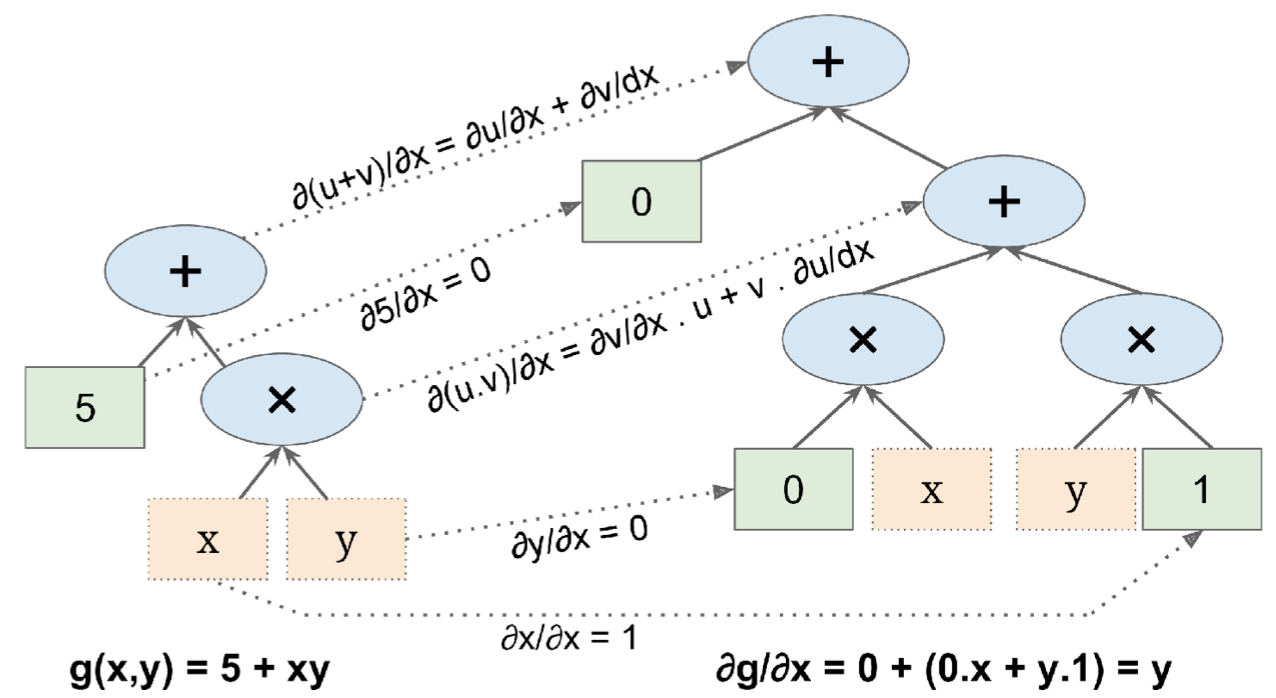  
  
  - <font color=green> symbolic differentiation</font>: forward-mode autodiff produced another computation graph

 # Reverse-mode autodiff   
 ***
 - is the solution implemented by TensorFlow  
 - First goes through the graph in the <font color=green> forward direction</font> (i.e., from the inputs to the output) to compute the value of each node.  
 - Second pass, this time in the <font color=green> reverse direction</font> (i.e., from the output to the inputs), to compute all the partial derivatives.  
   
 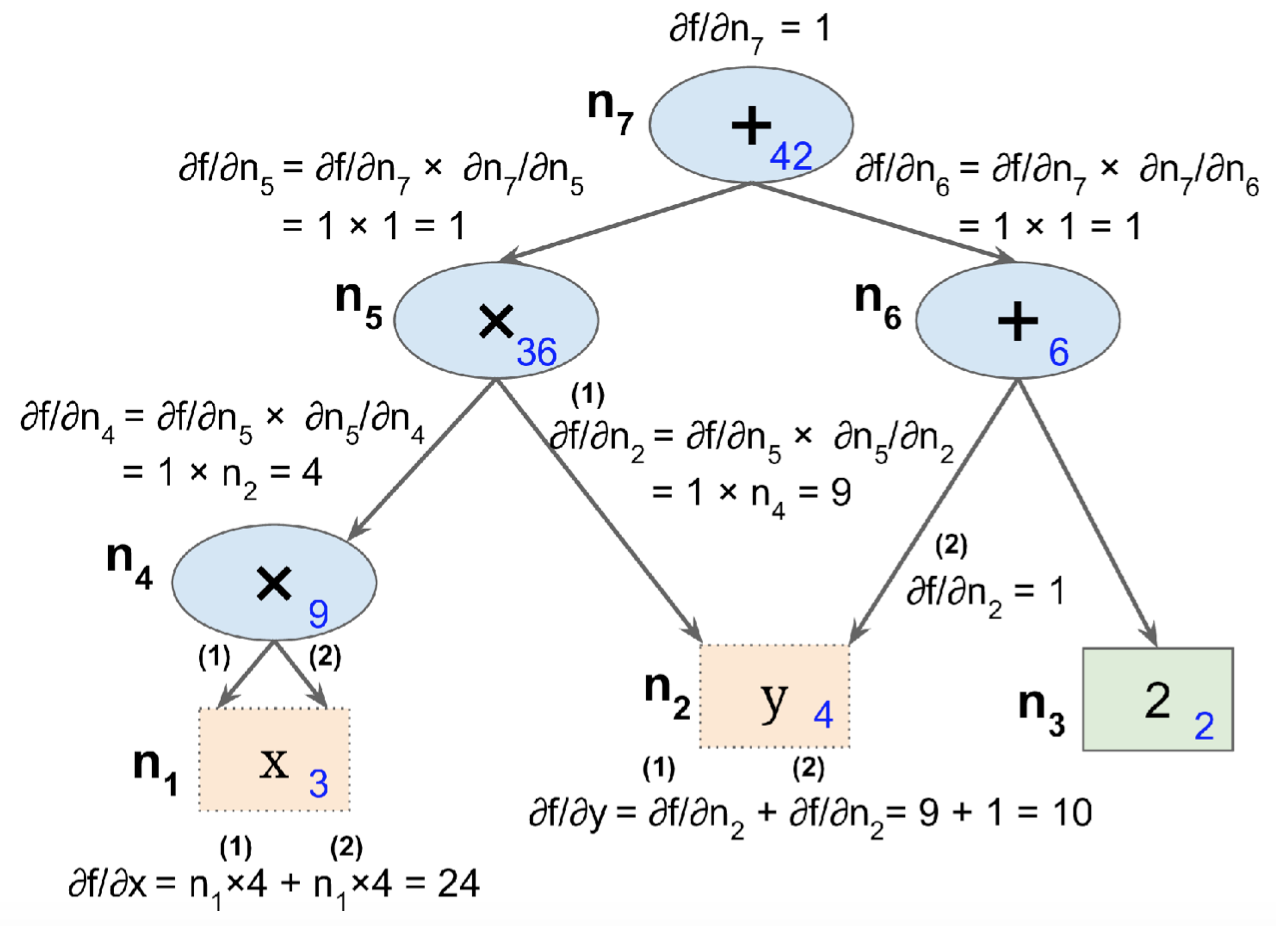  
   
 - Reverse-mode autodiff is a very powerful and accurate technique, when there are many inputs and few outputs.  
 - $f = n_7$ --> $∂f/∂n_7 = 1$   
 - $∂f/∂n_5 = ∂f/∂n_7 × ∂n7/∂n_5$  
 $ \,\,\,\qquad$ $ = 1 × ∂n7/∂n_5$ $ \,\,\,\qquad$ $n_7$ 은 $n_5 + n_6$ 합을 구하는 것이므로 $∂n_7/∂n_5$ = 1  
 $ \,\,\,\qquad$ $ = 1 × 1 $  
 - $∂f/∂n_4 = ∂f/∂n_5 × ∂n_5/∂n_4$ $ \,\qquad$ $n_5 = n_4 × n_2$ 이므로 $∂n_5/∂n_4 = n_2$  
 $ \,\,\,\qquad$ $= 1 × n_2 = 4$

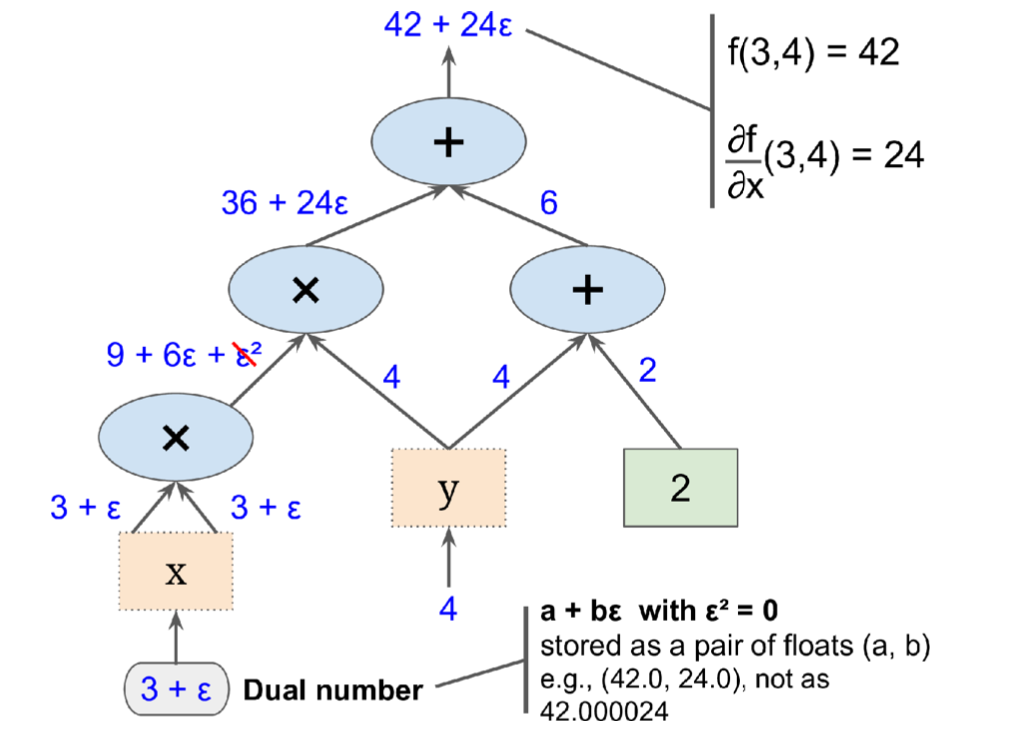

# Math  
***
Example: finding the derivative of $x^2$
Let's look at a concrete example. Let's see if we can determine what the slope of the $y=x^2$ curve is, at any point $\mathrm{A}$ (try to understand each line, I promise it's not that hard):

$
\begin{split}
f'(x_\mathrm{A}) \, & = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim\dfrac{f(x_\mathrm{B}) - f(x_\mathrm{A})}{x_\mathrm{B} - x_\mathrm{A}} \\
& = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim\dfrac{{x_\mathrm{B}}^2 - {x_\mathrm{A}}^2}{x_\mathrm{B} - x_\mathrm{A}} \quad && f(x) = x^2 \text{이므로}\\
& = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim\dfrac{(x_\mathrm{B} - x_\mathrm{A})(x_\mathrm{B} + x_\mathrm{A})}{x_\mathrm{B} - x_\mathrm{A}}\quad && {x_\mathrm{A}}^2 - {x_\mathrm{B}}^2 = (x_\mathrm{A}-x_\mathrm{B})(x_\mathrm{A}+x_\mathrm{B})\text{이므로 } \\
& = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim(x_\mathrm{B} + x_\mathrm{A})\quad && \text{} (x_\mathrm{B} - x_\mathrm{A}) \text{ 가 약분되서 없어진다}\\
& = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim x_\mathrm{B} \, + \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim x_\mathrm{A}\quad && \text{since the limit of a sum of the limit}\\
& = x_\mathrm{A} \, + \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim x_\mathrm{A} \quad && \text{since } x_\mathrm{B}\text{approaches } x_\mathrm{A}\text{} \\
& = x_\mathrm{A} + x_\mathrm{A} \quad && \text{since } x_\mathrm{A} \text{ remains constant when } x_\mathrm{B}\text{ approaches } x_\mathrm{A} \\
& = 2 x_\mathrm{A}
\end{split}
$

slope of $y = x^2$ at any point $\mathrm{A}$ is $f'(x_\mathrm{A}) = 2x_\mathrm{A}$. What we have done is called differentiation: finding the derivative of a function.    
<br>  

Note that we used a couple of important properties of limits. Here are the main properties you need to know to work with derivatives:

 - $\underset{x \to k}\lim c = c \quad$ 
 - $\underset{x \to k}\lim x = k \quad$ 
 - $\underset{x \to k}\lim\,\left[f(x) + g(x)\right] = \underset{x \to k}\lim f(x) + \underset{x \to k}\lim g(x) \quad$ 
 - $\underset{x \to k}\lim\,\left[f(x) \times g(x)\right] = \underset{x \to k}\lim f(x) \times \underset{x \to k}\lim g(x) \quad$ 
  
 - Deep Learning, differentiation is almost always performed automatically by the framework you are using (such as TensorFlow or PyTorch). This is called auto-diff   
 - for example when you use a square root in your cost function without realizing that its derivative approaches infinity when $x$ approaches 0 (tip: you should use $\sqrt{x+\epsilon}$ instead, where $\epsilon$ is some small constant, such as $10^{-4}$).
<font color=gray> 딥러닝에서 미분은 텐서플로나 파이토치에서 자동으로 된다 이것을 auto-diff 라한다.</font>


# Differentiation rules
One very important rule is that the derivative of a sum is the sum of the derivatives. More precisely, if we define $f(x) = g(x) + h(x)$, then $f'(x) = g'(x) + h'(x)$. This is quite easy to prove:

$
\begin{split}
f'(x) & = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon) - f(x)}{\epsilon} && \quad\text{by definition}\\
& = \underset{\epsilon \to 0}\lim\dfrac{g(x+\epsilon) + h(x+\epsilon) - g(x) - h(x)}{\epsilon} && \quad \text{using }f(x) = g(x) + h(x) \\
& = \underset{\epsilon \to 0}\lim\dfrac{g(x+\epsilon) - g(x) + h(x+\epsilon) - h(x)}{\epsilon} && \quad \text{just moving terms around}\\
& = \underset{\epsilon \to 0}\lim\dfrac{g(x+\epsilon) - g(x)}{\epsilon} + \underset{\epsilon \to 0}\lim\dfrac{h(x+\epsilon) - h(x)}{\epsilon} && \quad \text{since the limit of a sum is the sum of the limits}\\
& = g'(x) + h'(x) && \quad \text{using the definitions of }g'(x) \text{ and } h'(x)
\end{split}
$  

<br>  

Similarly, it is possible to show the following important rules 

|       | *Function $f\qquad $*         |    *Derivative $f'  $*   |
|:-----|:-----------------------|:-----------|
|Constant| $f(x) = c$|$f'(x) = 0 \quad $|  
|Sum|$f(x) = g(x)+h(x) \quad $ |$f'(x) = g'(x) + h'(x)$|
|Product|$f(x) = g(x) h(x)$|	$f'(x) = g(x)h'(x) + g'(x)h(x)$|
|Quotient|$f(x) = \dfrac{g(x)}{h(x)}$|$f'(x) = \dfrac{g'(x)h(x) - g(x)h'(x)}{h^2(x)}$|
|Power|	$f(x) = x^r$ with $r \neq 0$|	$f'(x) = rx^{r-1}$|
|Exponential|	$f(x) = \exp(x)$|	$f'(x)=\exp(x)$|
|Logarithm|	$f(x) = \ln(x)$|	$f'(x) = \dfrac{1}{x} $|
|Sin|$f(x) = \sin(x)$|	$f'(x) = \cos(x) $|  
|Cos|$f(x) = \cos(x)$|	$f'(x) = -\sin(x) $|
|Tan|	$f(x) = \tan(x)$|	$f'(x) = \dfrac{1}{\cos^2(x)}$|
|Chain Rule|	$f(x) = g(h(x))$|	$f'(x) = g'(h(x))\,h'(x)$|


# The chain rule
The chain rule is easier to remember using Leibniz's notation:

If $f(x)=g(h(x))$ and $y=h(x)$, then: $\dfrac{\mathrm{d}f}{\mathrm{d}x} = \dfrac{\mathrm{d}f}{\mathrm{d}y} \dfrac{\mathrm{d}y}{\mathrm{d}x}$

Indeed, $\dfrac{\mathrm{d}f}{\mathrm{d}y} = f'(y) = f'(h(x))$ and $\dfrac{\mathrm{d}y}{\mathrm{d}x}=h'(x)$.

It is possible to chain many functions. For example, if $f(x)=g(h(i(x)))$, and we define $y=i(x)$ and $z=h(y)$, then $\dfrac{\mathrm{d}f}{\mathrm{d}x} = \dfrac{\mathrm{d}f}{\mathrm{d}z} \dfrac{\mathrm{d}z}{\mathrm{d}y} \dfrac{\mathrm{d}y}{\mathrm{d}x}$. Using Lagrange's notation, we get $f'(x)=g'(z)\,h'(y)\,i'(x)=g'(h(i(x)))\,h'(i(x))\,i'(x)$

The chain rule is crucial in Deep Learning, as a neural network is basically as a long composition of functions. For example, a 3-layer dense neural network corresponds to the following function: $f(\mathbf{x})=\operatorname{Dense}_3(\operatorname{Dense}_2(\operatorname{Dense}_1(\mathbf{x})))$ (in this example, $\operatorname{Dense}_3$ is the output layer).

# Computing Gradients with Autodiff  
***   
$3*{w_1}^2+2*w_1*w_2$
 - partial derivative of this function with regard to   
 $w_1$ is $6 * w_1 + 2 * w_2$.
 - partial derivative with regard to   
 $w_2$ is $2 * w_1$.
 - (w1, w2) = (5, 3), these partial derivatives are equal to 36 and 10.
 - gradient vector at this point is (36, 10)

In [19]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

 - compute an approximation of each partial derivative by measuring how much the function’s output changes when you tweak the corresponding parameter.

In [20]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [21]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

 - Needing to call f() at least once per parameter makes this approach intractable for large neural networks. So instead, we should use autodiff.  
  - <font color=gray>[파라미터마다 f()를 불러와야 하는 것은 큰 뉴럴 네트워크 에서 intractable하다. 그러므로  autodiff를 써야한다.]</font>   
 - first define two variables w1 and w2 (<font color=pink>tf.Variable</font>) 
 - then we create a <font color=pink>tf.GradientTape</font> context that will automatically record every operation that involves a variable  
 - finally we ask this tape to compute the gradients of the result z with regard to both variables [w1, w2].

In [36]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

- Not only is the result accurate  
 - <font color=gray>결과도 정확하고</font>
-  <font color=pink>gradient()</font> method only goes through the recorded computations once (in reverse order)  
 - <font color=gray>gradient()로 한번에 계산 (in reverse order??)</font>  
<br>  
- To save memory  
 - pause recording by creating a with <font color=pink>tape.stop_recording()</font> block inside the <font color=pink>tf.Gradient Tape()</font> block.  
 - <font color=gray>메모리 세이브 하기 위해 tf.Gradient Tape() 안에 tape.stop_recording()를 만든다.</font>    
 

In [37]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

 - The tape is automatically erased immediately after you call its <font color=pink>gradient()</font> method  
 <font color=gray>테이프는 Gradient() 를 사용하면 자동으로 지워진다.</font> 

In [24]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
try:
    dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print(ex)

GradientTape.gradient can only be called once on non-persistent tapes.


<font color=pink>GradientTape.gradient</font> can only be called once on non-persistent tapes.

In [38]:
dz_dw1

<tf.Tensor: shape=(), dtype=float32, numpy=36.0>

In [26]:
dz_dw2

NameError: name 'dz_dw2' is not defined

In [40]:
with tf.GradientTape(persistent=True) as tape:    # 1. you must make the tape persistent 
     z = f(w1, w2)
dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2) # works now!
del tape    # 2. and delete it each time you are done with it to free resources.

In [41]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

In [42]:
# so if you try to compute the gradient of z with regard to anything other than a variable, 
# the result will be None:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])    # returns [None, None]

In [43]:
gradients

[None, None]

In [44]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])  # returns [tensor 36., tensor 10.]

In [45]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

 <br>  
- Most of the time a gradient tape is used to compute the gradients of a single value (usually the loss) with regard to a set of values (usually the model parameters).  
 - just needs to do one forward pass and one reverse pass to get all the gradients at once.  
- if you ever need to get the individual gradients (e.g., the gradients of each loss with regard to the model parameters), you must call the tape’s <font color=pink>jacobian()</font>   
 - If you try to compute the gradients of a vector, for example a vector containing multiple losses, then TensorFlow will compute the gradients of the vector’s sum.  
 - it will perform reverse-mode autodiff once for each loss in the vector (all in parallel by default)  
 - even possible to compute second-order partial derivatives (the<font color=pink> Hessians</font>, i.e., the partial derivatives of the partial derivatives), but this is rarely needed in practice.  


In [253]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [254]:
with tf.GradientTape(persistent=True) as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tf.reduce_sum(tf.stack([tape.gradient(z, [w1, w2]) for z in (z1, z2, z3)]), axis=0)
del tape

In [255]:
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
            for jacobian in jacobians]
del hessian_tape

In [256]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [257]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

- you may want to stop gradients from backpropagating through some part of your neural network. To do this, you must use the <font color=pink>tf.stop_gradient()</font> function.  
 - returns its inputs during the forward pass (like <font color=pink>tf.identity()</font>), but it does not let gradients through during backpropagation (it acts like a constant):

In [258]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)    # tf.stop_gradient()

with tf.GradientTape() as tape:
    z = f(w1, w2)    # same result as without stop_gradient()

tape.gradient(z, [w1, w2])    # => returns [tensor 30., None]

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [259]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_softplus(x)    # my_softplus() function

tape.gradient(z, [x])    # large inputs, the result will be NaN -> 무한대/무한대

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

  - <font color=green>NaN</font> : This is because computing the gradients of this function using autodiff leads to some numerical difficulties:  
   - due to floating-point precision errors.  
   - autodiff ends up computing  <font color=green>infinity divided by infinity</font>(which returns NaN)  
   - 

In [260]:
tf.math.log(tf.exp(tf.constant(30., dtype=tf.float32)) + 1.)

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [261]:
x = tf.Variable([100.])
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

 - Next, we can tell TensorFlow to use this stable function when computing the gradients of the <font color=pink>my_softplus()</font> function by decorating it with <font color=pink>@tf.custom_gradient</font>  
  - making it return both its normal output and the function that computes the derivatives 

In [46]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

In [47]:
# (however, the main output still explodes because of the exponential; 
# one workaround is to use tf.where() to return the inputs when they are large)
def my_better_softplus(z):
    return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

In [48]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

 - You can now compute the gradients of any function  
 (provided it is differentiable at the point where you compute it),   
 even blocking backpropagation when needed, and write your own gradient functions!

# Custom Training Loops  
***  
uses two different optimizers: one for the wide path and the other for the deep path.   
 - <font color=pink>fit()</font> method may not be flexible enough for what you need to do.  
 - <font color=pink>fit()</font> method only uses one optimizer 

In [49]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [51]:
# will randomly sample a batch of instances from the training set 
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [52]:
# function that will display the training status
# can use tqdm library instead.
def print_status_bar(iteration, total, loss, metrics=None):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())    # {:.4f} will format a float with four digits after the decimal point
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{}/{} - ".format(iteration, total) + metrics,
          end=end)    # \r (carriage return) along with end="" ensures that the status bar always gets printed on the same line. 

In [53]:
import time

mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 - loss: 0.0900 - mean_square: 858.5000


In [54]:
def progress_bar(iteration, total, size=30):
    running = iteration < total
    c = ">" if running else "="
    p = (size - 1) * iteration // total
    fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
    params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
    return fmt.format(*params)

In [55]:
progress_bar(3500, 10000, size=6)

' 3500/10000 [=>....]'

In [56]:
# progress_bar()
def print_status_bar(iteration, total, loss, metrics=None, size=30):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{} - {}".format(progress_bar(iteration, total), metrics), end=end)

In [57]:
mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 [==============================] - loss: 0.0900 - mean_square: 858.5000


In [58]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

1. create two nested loops: one for the epochs, the other for the batches within an epoch.  
2. we sample a random batch from the training set.  
3. Inside the <font color=pink>tf.GradientTape()</font> block, we make a prediction for one batch (using the model as a function), and we compute the loss:  
 - <font color=pink>mean_squared_error()</font> function returns one loss per instance, we compute the mean over the batch using <font color=pink>tf.reduce_mean()</font>.  
 - <font color=pink>tf.add_n()</font>, which sums multiple tensors of the same shape and data type).  
4. ask the tape to compute the gradient of the loss with regard to each trainable variable (not all variables!)   
5. apply them to the optimizer to perform a Gradient Descent step.  
6. update the mean loss and the metrics (over the current epoch), and we display the status bar.  
7. At the end of each epoch, we display the status bar again to make it look complete.  
8. reset the states of the mean loss and the metrics.

In [62]:
# create two nested loops(epochs,batches within an epoch )
for epoch in range(1, n_epochs + 1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)    # sample a random batch from the training
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)    # make a prediction for one batch
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))    # compute the loss:
            loss = tf.add_n([main_loss] + model.losses)    # sums multiple tensors of the same shape and data type
        gradients = tape.gradient(loss, model.trainable_variables) # compute the gradient of the loss
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))    # apply them to the optimizer
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        mean_loss(loss)
        for metric in metrics:    # update the mean loss and the metrics
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)    # display the status bar
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)    # At the end of each epoch, we display the status bar again
    for metric in [mean_loss] + metrics:
        metric.reset_states()    # reset the states of the mean loss and the metrics.

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

11610/11610 [==============================] - mean: 1.3955 - mean_absolute_error: 0.5722
Epoch 2/5
11610/11610 [==============================] - mean: 0.6774 - mean_absolute_error: 0.5280
Epoch 3/5
11610/11610 [==============================] - mean: 0.6351 - mean_absolute_error: 0.5177
Epoch 4/5
11610/11610 [==============================] - mean: 0.6384 - mean_absolute_error: 0.5181
Epoch 5/5
11610/11610 [==============================] - mean: 0.6440 - mean_absolute_error: 0.5222


In [63]:
try:
    from tqdm.notebook import trange
    from collections import OrderedDict
    
    with trange(1, n_epochs + 1, desc="All epochs") as epochs:
        for epoch in epochs:
            with trange(1, n_steps + 1, desc="Epoch {}/{}".format(epoch, n_epochs)) as steps:
                for step in steps:
                    X_batch, y_batch = random_batch(X_train_scaled, y_train)
                    with tf.GradientTape() as tape:
                        y_pred = model(X_batch)
                        main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                        loss = tf.add_n([main_loss] + model.losses)
                    gradients = tape.gradient(loss, model.trainable_variables)
                    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                    for variable in model.variables:
                        if variable.constraint is not None:
                            variable.assign(variable.constraint(variable))                    
                    status = OrderedDict()
                    mean_loss(loss)
                    status["loss"] = mean_loss.result().numpy()
                    for metric in metrics:
                        metric(y_batch, y_pred)
                        status[metric.name] = metric.result().numpy()
                    steps.set_postfix(status)
            for metric in [mean_loss] + metrics:
                metric.reset_states()
except ImportError as ex:
    print("To run this cell, please install tqdm, ipywidgets and restart Jupyter")

# TensorFlow Functions and Graphs 
***  
 - Once the optimized graph is ready, the TF Function efficiently executes the operations in the graph  
  - As a result, a TF Function will usually run much faster than the original Python function.  
  - especially if it performs complex computations.  
    - the computation graph is so small that there is nothing at all to optimize, so <font color=pink>tf_cube()</font> actually runs much slower than <font color=pink>cube()</font>.  
  
 - Moreover, when you write a custom loss function, a custom metric, a custom layer, or any other custom function and you use it in a Keras model.  
  - Keras automatically converts your function into a TF Function— <font color=green>no need to use</font> <font color=pink>tf.function()</font>  
  - can tell Keras not to convert your Python functions to TF Functions by setting <font color=pink>dynamic=True</font>  
  
 - If you call a TF Function many times with different numerical Python values, then many graphs will be generated, slowing down your program and using up a lot of RAM (you must delete the TF Function to release it).  
   
   <font color=gray>tf.function() 이 파이썬 function 보다 빠르다</font>

In [64]:
def cube(x):
    return x ** 3

In [65]:
cube(2)

8

In [66]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

#### tf.function()   
 - to convert this Python function to a TensorFlow function  
 - TF Function generates a <font color=green>new graph for every unique set</font> of input shapes and data types and caches it for subsequent calls.    

<font color=gray>tf.function() 을 이용하여 파이썬 function을 텐서플로우 function 으로 바꾼다.  
그러면 결과값은 같지만 tensor 형태로</font>

In [29]:
# tf_cube() actually runs much slower than cube().
tf_cube = tf.function(cube)
tf_cube

In [30]:
tf_cube(2)    
# calling tf_cube(10) and tf_cube(20) will generate two graphs.  

# tf_cube(tf.constant(10)), a graph will be generated for int32 tensors of shape []. 
# Then if you call tf_cube(tf.constant(20)), the same graph will be reused  

# tf_cube(tf.constant([10, 20])), a new graph will be generated for int32 tensors of shape [2]

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [31]:
tf_cube(tf.constant(2.0))    # float

# generated for float32 tensors of shape []  
# the same graph will be reused
# call tf_cube(tf.constant([10, 20])), a new graph will be generated for int32 tensors of shape [2]

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

<font color=gray>또는 @tf.function decorater을 이용하여 파이썬 function을 텐서플로우 function 으로 바꾼다.</font>

In [70]:
@tf.function
def tf_cube(x): 
    return x ** 3

In [68]:
tf_cube.python_function(2)

8

In [69]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

#### AutoGraph and Tracing  
***  
So how does TensorFlow generate graphs?   
<font color=gray>TF 가 어떻게 그레프를 만드는지?</font> 
 - Starts by analyzing the Python function’s source code to capture all the control flow statements. Called <font color=green>AutoGraph</font>  
 (loops, while loops, and if statements, as well as break, continue, and return statements)  
  - \__add__() and \__mul__() to capture operators like + and $*$ 
  - no \__while__() or \__if__() magic methods.  
  - AutoGraph outputs an upgraded version of that function <font color=pink>tf.while_loop()</font> for loops and <font color=pink>tf.cond()</font> for if statements.  
  
<br>
<font color=gray> 먼저 AutoGraph -> loops, while loops, and if statements, as well as break, continue, and return statements 를 분석. 
sum_squares() 파이썬 함수를 tf__sum_squares() 함수로 바꾼다.   
for loop는 loop_body()로   
 -  sum_squares(tf.constant(10))를 실행하면 tf__sum_squares()함수를 불러온다 with a symbolic tensor of type int32 and shape [].</font> 
  
  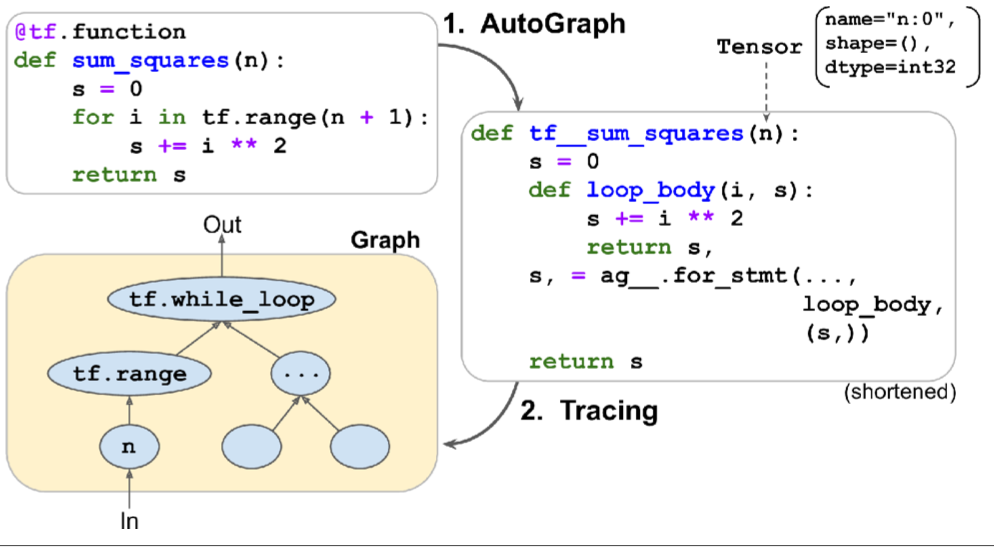  
  
  
 1. AutoGraph analyzes the source code of the <font color=pink>sum_squares()</font> Python function.  
 2. generates the <font color=pink>tf__sum_squares()</font> function.  
 loop is replaced by the definition of the <font color=pink>loop_body()</font> function  followed by a call to the <font color=pink>for_stmt()</font> function.  
 (with a symbolic tensor of type int32 and shape [])
 3. the final graph being generated during tracing.  
 
 
  - you can call tf.auto graph.to_code(sum_squares.python_function)

# TF Function Rules
***  
decorate it with <font color=pink>@tf.function</font> or let Keras take care of it for you  
 - make sure you use <font color=pink>tf.reduce_sum()</font> instead of <font color=pink>np.sum(), tf.sort()</font> instead of the built-in sorted() function, and so on (unless you really want the code to run only during tracing)  
  - <font color=pink>np.random.rand()</font>, a random number will only be generated when the function is traced, so f(tf.con stant(2.)) and f(tf.constant(3.)) will return the same random number, but f(tf.constant([2., 3.])) will return a different one.  
  - <font color=pink>np.random.rand()</font> with <font color=pink>tf.random.uniform([])</font>, then a new random number will be generated upon every call.  
 - other functions do not need to be decorated with @tf.function.  
 - If the function creates a TensorFlow variable (or any other stateful TensorFlow object, such as a dataset or a queue), it must do so upon the very first call, and only then, or else you will get an exception.   
 If you want to assign a new value to the variable, make sure you call its assign() method, instead of using the = operator.  
 - The source code of your Python function should be available to TensorFlow.  
 (define your function in the Python shell, which does not give access to the source code, or if you deploy only the compiled *.pyc Python files to production)
 - TensorFlow will only capture for loops that iterate over a tensor or a dataset. So make sure you use for i in <font color=pink>tf.range(x)</font> rather than for i in <font color=pink>range(x)</font>  
 - for performance reasons, you should prefer a vectorized implementation whenever you can, rather than using loops

# APPENDIX G  
***  
## TensorFlow Graphs  
#### TF Functions and Concrete Functions
***  
explore the graphs generated by TF Functions  
 - TF Functions are polymorphic, meaning they support inputs of different types (and shapes).

In [32]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function.graph

In [33]:
concrete_function(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [34]:
concrete_function is tf_cube.get_concrete_function(tf.constant(2.0))


True

#### Exploring Function Definitions and Graphs  
***  
 - can access a concrete function’s computation graph using the graph attribute,  
 and get the list of its operations by calling the graph’s get_operations() 

In [35]:
concrete_function.graph

In [36]:
ops = concrete_function.graph.get_operations()
ops
# first operation represents the input argument x (it is called a placeholder), 
# second “operation” represents the constant 3,
# third operation represents the power operation (**), 
# final operation represents the output of this function

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

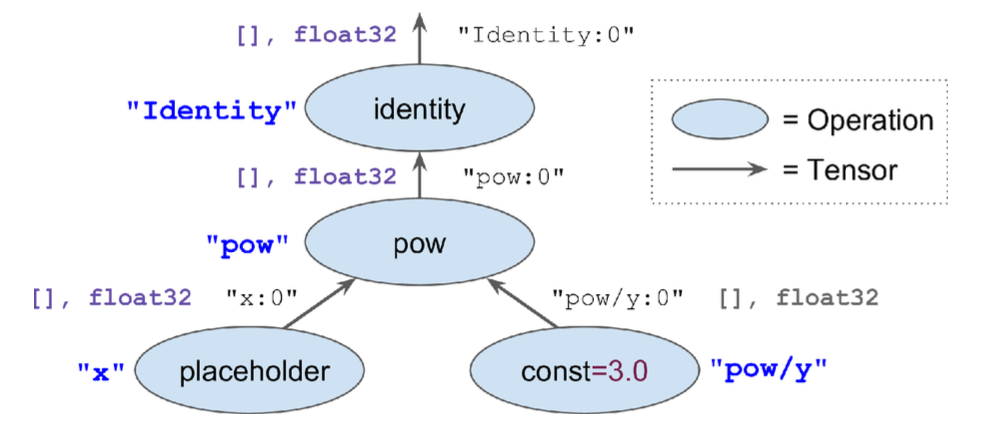  
<br>  
 - can fetch an operation or a tensor by name using the graph’s get_operation_by_name() or get_tensor_by_name()

In [37]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [38]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [39]:
concrete_function.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [40]:
concrete_function.graph.get_tensor_by_name('Identity:0')

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [41]:
# concrete function also contains the function definition (represented as a protocol buffer)
concrete_function.function_def.signature 

name: "__inference_cube_393937"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

# How TF Functions Trace Python Functions to Extract Their Computation Graphs  
***  
 - if you call <font color=pink>tf_cube(tf.constant(3.0))</font>, the TF Function will reuse the same concrete function it used for <font color=pink>tf_cube(tf.constant(2.0)) </font>(for float32 scalar tensors)  
 -  another for <font color=pink>tf_cube(tf.constant([[1.0, 2.0], [3.0, 4.0]]))</font> (for float32 tensors of shape [2, 2])  
 <br>  
 
 <font color=pink>tf_cube()</font> TF Function, after we called <font color=pink>tf_cube(2)</font> and <font color=pink>tf_cube(tf.constant(2.0)) </font> 
 
 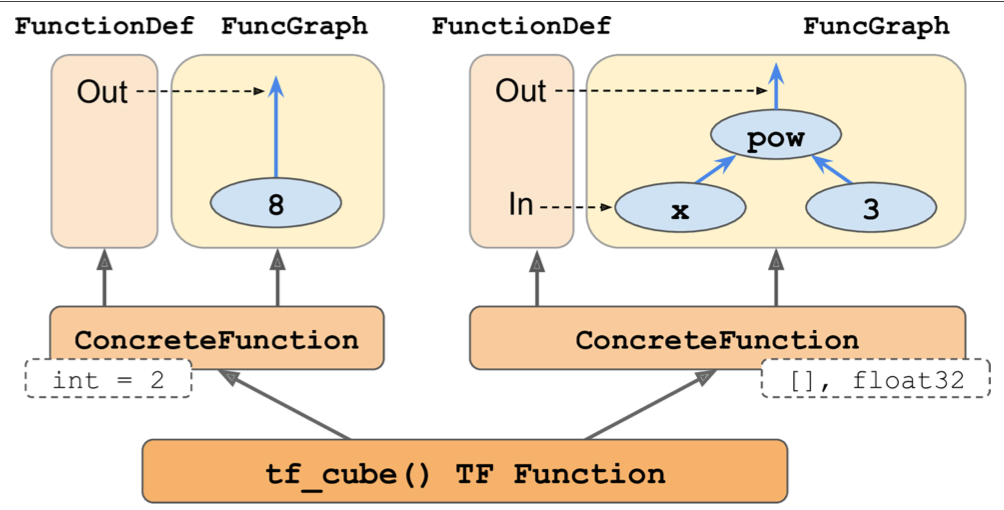  
 
 

In [74]:
@tf.function
def tf_cube(x):
    print("print:", x)
    return x ** 3

In [75]:
result = tf_cube(tf.constant(2.0))     #  printed: x is a symbolic tensor! 
# print() function is not a TensorFlow operation
#it will only run when the Python function is traced, which happens in graph mode, 
# with arguments replaced with symbolic tensors (same type and shape, but no value)

print: Tensor("x:0", shape=(), dtype=float32)


In [76]:
result   # has a shape and a data type, but no value. 

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [77]:
result = tf_cube(tf.constant(3.0))
# print() function was not captured into the graph, 
# the next times we call tf_cube() with float32 scalar tensors, nothing is printed

In [78]:
# traced (i.e., every time the TF Function is called with a new input signature).
result = tf_cube(2)    # new Python value: trace!
result = tf_cube(3)    # new Python value: trace!
result = tf_cube(tf.constant([[1., 2.]])) # New shape: trace!
result = tf_cube(tf.constant([[3., 4.], [5., 6.]])) # New shape: trace!
result = tf_cube(tf.constant([[7., 8.], [9., 10.]])) # Same shape: no trace
result = tf_cube(tf.constant([[7., 8.], [9., 10.], [11., 12.]])) # no trace

print: 2
print: 3
print: Tensor("x:0", shape=(1, 2), dtype=float32)
print: Tensor("x:0", shape=(2, 2), dtype=float32)
print: Tensor("x:0", shape=(3, 2), dtype=float32)


 - you may want to restrict a TF Function to a specific input signature.  
  - suppose you know that you will only ever call a TF Function with batches of 28 × 28–pixel images, but the batches will have very different sizes.   
  - may not want TensorFlow to generate a different concrete function for each batch size, or count on it to figure out on its own when to use None.  
  
  <br>  
 - TF Function will accept any float32 tensor of shape [*, 28, 28], and it will reuse
the same concrete function every time:

In [46]:
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("Tracing", images)
    return images[:, ::2, ::2] # drop half the rows and columns

In [73]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
preprocessed_images = shrink(img_batch_1) # Traces the function.
preprocessed_images = shrink(img_batch_2) # Reuses the same concrete function.

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [49]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
    preprocessed_images = shrink(img_batch_3)  # rejects unexpected types or shapes
except ValueError as ex:
    print(ex)

Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[0.7413678  0.62854624]
  [0.01738465 0.3431449 ]]

 [[0.51063764 0.3777541 ]
  [0.07321596 0.02137029]]], shape=(2, 2, 2), dtype=float32))
  input_signature: (
    TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None))


#### Using Autograph To Capture Control Flow  
***  
A "static" for loop using range():

In [79]:
@tf.function
def add_10(x):
    for i in range(10):
        x += 1
    return x

In [80]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [81]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()
# It works fine, but when we look at its graph, we find that it does not contain a loop: 
# it just contains 10 addition operations!

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

 - If you want the graph to contain a “dynamic” loop instead    
  - (i.e., one that runs when the graph is executed),
  -  A "dynamic" loop using <font color=pink>tf.while_loop()</font>:  
  - it only captures for loops that iterate over <font color=pink>tf.range(), not range()</font>.  
    - If you use <font color=pink>range()</font>, the for loop will be static, meaning it will only be executed when the function is traced.  
    - If you use <font color=pink>tf.range()</font>, the loop will be dynamic, meaning that it will be included in the graph itselt. 
    (but it will not run during tracing).

In [82]:
@tf.function
def add_10(x):
    condition = lambda i, x: tf.less(i, 10)
    body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

In [83]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [84]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

#### Handling Variables and Other Resources in TF Functions  
***  
TensorFlow, variables and other stateful objects, such as queues or datasets, are called <font color=green>resources</font>.

In [103]:
counter = tf.Variable(0)

@tf.function
def increment(counter, c=1):
    return counter.assign_add(c)

In [104]:
increment(counter)    # counter is now equal to 1
increment(counter)    # counter is now equal to 2

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [105]:
function_def = increment.get_concrete_function(counter).function_def    # name: "counter"
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [106]:
# possible to use a tf.Variable defined outside of the function, without explicitly passing it as an argument
counter = tf.Variable(0)

@tf.function
def increment(c=1):
    return counter.assign_add(c)

In [107]:
increment()
increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [108]:
function_def = increment.get_concrete_function().function_def    #name: "assignaddvariableop_resource"
function_def.signature.input_arg[0]

name: "assignaddvariableop_resource"
type: DT_RESOURCE

In [109]:
class Counter:
    def __init__(self):
        self.counter = tf.Variable(0)

    @tf.function
    def increment(self, c=1):
        return self.counter.assign_add(c)

In [110]:
c = Counter()
c.increment()
c.increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

 - Do not use =, +=, -=, or any other Python assignment operator with TF variables.  
 - Instead, you must use the <font color=pink>assign(), assign_add(), or assign_sub()</font> methods.  
  - If you try to use a Python assignment operator, you will get an exception when you call the method.

In [111]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x += 1
    return x

tf.autograph.to_code(add_10.python_function)

"def tf__add_10(x):\n    do_return = False\n    retval_ = ag__.UndefinedReturnValue()\n    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:\n\n        def get_state():\n            return (x,)\n\n        def set_state(loop_vars):\n            nonlocal x\n            (x,) = loop_vars\n\n        def loop_body(itr):\n            nonlocal x\n            i = itr\n            x += 1\n        ag__.for_stmt(ag__.converted_call(tf.range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {})\n        try:\n            do_return = True\n            retval_ = fscope.mark_return_value(x)\n        except:\n            do_return = False\n            raise\n    (do_return,)\n    return ag__.retval(retval_)\n"

In [112]:
def display_tf_code(func):
    from IPython.display import display, Markdown
    if hasattr(func, "python_function"):
        func = func.python_function
    code = tf.autograph.to_code(func)
    display(Markdown('```python\n{}\n```'.format(code)))

In [113]:
display_tf_code(add_10)

```python
def tf__add_10(x):
    do_return = False
    retval_ = ag__.UndefinedReturnValue()
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:

        def get_state():
            return (x,)

        def set_state(loop_vars):
            nonlocal x
            (x,) = loop_vars

        def loop_body(itr):
            nonlocal x
            i = itr
            x += 1
        ag__.for_stmt(ag__.converted_call(tf.range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {})
        try:
            do_return = True
            retval_ = fscope.mark_return_value(x)
        except:
            do_return = False
            raise
    (do_return,)
    return ag__.retval(retval_)

```

#### Using TF Functions with tf.keras (or Not)  
***  
 - By default, any custom function, layer, or model you use with tf.keras will automatically be converted to a TF Function.  
  - you may want to deactivate this automatic conversion—for example, if your custom code cannot be turned into a TF Function, or if you just want to debug your code, which is much easier in eager mode.

In [115]:
# Custom loss function
def my_mse(y_true, y_pred):
    print("Tracing loss my_mse()")
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [116]:
# Custom metric function
def my_mae(y_true, y_pred):
    print("Tracing metric my_mae()")
    return tf.reduce_mean(tf.abs(y_pred - y_true))

In [117]:
# Custom layer
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.units),
                                      initializer='uniform',
                                      trainable=True)
        self.biases = self.add_weight(name='bias', 
                                      shape=(self.units,),
                                      initializer='zeros',
                                      trainable=True)
        super().build(input_shape)

    def call(self, X):
        print("Tracing MyDense.call()")
        return self.activation(X @ self.kernel + self.biases)

In [118]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [119]:
# Custom model
class MyModel(keras.models.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = MyDense(30, activation="relu")
        self.hidden2 = MyDense(30, activation="relu")
        self.output_ = MyDense(1)

    def call(self, input):
        print("Tracing MyModel.call()")
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_(concat)
        return output

model = MyModel()

In [120]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

In [121]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
357/363 [============================>.] - ETA: 0s - loss: 1.3387 - my_mae: 0.7943Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
363/363 [==============================] - 2s 5ms/step - loss: 1.3255 - my_mae: 0.7900 - val_loss: 0.5569 - val_my_mae: 0.4819
Epoch 2/2
162/162 [==============================] - 0s 2ms/step - loss: 0.4164 - my_mae: 0.4639


[0.4163525402545929, 0.4639028012752533]

 - You can turn this off by creating the model with <font color=pink>dynamic=True</font> (or calling <font color=pink>super().\__init__(dynamic=True, **kwargs)</font> in the model's constructor):

In [122]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [123]:
model = MyModel(dynamic=True)    # dynamic=True

In [124]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

 - Not the custom code will be called at each iteration. Let's fit, validate and evaluate with tiny datasets to avoid getting too much output:

In [125]:
model.fit(X_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.507260322570801, 2.0566811561584473]

 - Alternatively, you can compile a model with <font color=pink>run_eagerly=True</font>:

In [126]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [127]:
model = MyModel()

In [129]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae], run_eagerly=True)    # run_eagerly=True

In [130]:
model.fit(X_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.507260322570801, 2.0566811561584473]

# Custom Optimizers  
***  
 -  Defining custom optimizers is not very common, but in case you are one of the happy few who gets to write one, here is an example:

In [131]:
class MyMomentumOptimizer(keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.001, momentum=0.9, name="MyMomentumOptimizer", **kwargs):
        """Call super().__init__() and use _set_hyper() to store hyperparameters"""
        super().__init__(name, **kwargs)
        self._set_hyper("learning_rate", kwargs.get("lr", learning_rate)) # handle lr=learning_rate
        self._set_hyper("decay", self._initial_decay) # 
        self._set_hyper("momentum", momentum)
    
    def _create_slots(self, var_list):
        """For each model variable, create the optimizer variable associated with it.
        TensorFlow calls these optimizer variables "slots".
        For momentum optimization, we need one momentum slot per model variable.
        """
        for var in var_list:
            self.add_slot(var, "momentum")

    @tf.function
    def _resource_apply_dense(self, grad, var):
        """Update the slots and perform one optimization step for one model variable
        """
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype) # handle learning rate decay
        momentum_var = self.get_slot(var, "momentum")
        momentum_hyper = self._get_hyper("momentum", var_dtype)
        momentum_var.assign(momentum_var * momentum_hyper - (1. - momentum_hyper)* grad)
        var.assign_add(momentum_var * lr_t)

    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum"),
        }

In [132]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [133]:
model = keras.models.Sequential([keras.layers.Dense(1, input_shape=[8])])
model.compile(loss="mse", optimizer=MyMomentumOptimizer())
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 3.8128
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 1.4877
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.9162
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.7587
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 0.7050
